In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier, SGDRegressor
import lightgbm as lgb
import joblib
from pathlib import Path
import sqlite3
from sklearn.multioutput import MultiOutputRegressor
import optuna
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
lgbm_preds = pd.read_csv('../data/lgbm_preds.csv')
sgd_preds = pd.read_csv('../data/sgd_preds.csv')


In [5]:
lgbm_preds['HOME_WL_PRED'] = (lgbm_preds['HOME_SCORE_PRED'] > lgbm_preds['AWAY_SCORE_PRED']).astype(int)

lgbm_preds['ML_BET_CORRECT'] = (lgbm_preds['HOME_WL_PRED'] == lgbm_preds['HOME_WL']).astype(int)
lgbm_preds['HOME_COVER_PRED'] = (lgbm_preds['AWAY_SCORE_PRED'] - lgbm_preds['HOME_SCORE_PRED'] < lgbm_preds['HOME_SPREAD']).astype(int)

lgbm_preds['ATS_BET_CORRECT'] = (lgbm_preds['HOME_COVER_PRED'] == lgbm_preds['HOME_TEAM_COVERED']).astype(int)
lgbm_preds

,SEASON,HOME_TEAM_ABBREVIATION,GAME_DATE,GAME_ID,MATCHUP,HOME_HOME_GAME,HOME_TEAM_SCORE,HOME_ML,HOME_SPREAD,HOME_ATS_DIFF,...,HOME_POINT_DIFF,HOME_WL,AWAY_ML,AWAY_TEAM_SCORE,HOME_SCORE_PRED,AWAY_SCORE_PRED,HOME_WL_PRED,ML_BET_CORRECT,HOME_COVER_PRED,ATS_BET_CORRECT
0,2021-22,LAL,2021-10-22 00:00:00,22100025,LAL vs. PHX,1,105,1.909091,-3.5,-13.5,...,-10,0,1.909091,115,102.370220,109.398763,0,1,0,1
1,2021-22,DEN,2021-10-22 00:00:00,22100024,DEN vs. SAS,1,102,1.357143,-7.0,-1.0,...,6,1,3.400000,96,117.799738,114.946617,1,1,0,1
2,2021-22,HOU,2021-10-22 00:00:00,22100023,HOU vs. OKC,1,124,1.800000,-1.5,31.5,...,33,1,2.050000,91,117.186012,110.529161,1,1,1,1
3,2021-22,CHI,2021-10-22 00:00:00,22100022,CHI vs. NOP,1,128,1.370370,-7.0,9.0,...,16,1,3.300000,112,113.556102,104.494941,1,1,1,1
4,2021-22,SAC,2021-10-22 00:00:00,22100026,SAC vs. UTA,1,101,2.900000,5.5,-3.5,...,-9,0,1.454545,110,110.732679,113.679173,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2021-22,GSW,2022-06-05 00:00:00,42100402,GSW vs. BOS,1,107,1.500000,-5.5,13.5,...,19,1,2.700000,88,106.781109,103.212457,1,1,0,0
1230,2021-22,BOS,2022-06-08 00:00:00,42100403,BOS vs. GSW,1,116,1.598802,-3.5,12.5,...,16,1,2.350000,100,109.950092,101.967534,1,1,1,1
1231,2021-22,BOS,2022-06-10 00:00:00,42100404,BOS vs. GSW,1,97,1.549451,-4.0,-14.0,...,-10,0,2.400000,107,102.279826,102.685080,0,1,0,1
1232,2021-22,GSW,2022-06-13 00:00:00,42100405,GSW vs. BOS,1,104,1.549451,-4.0,6.0,...,10,1,2.500000,94,109.234147,102.719574,1,1,1,1


In [6]:
lgbm_preds['ATS_BET_CORRECT'].mean()

0.5761750405186385

In [7]:
lgbm_preds = pd.read_csv('../data/lgbm_preds.csv')
sgd_preds = pd.read_csv('../data/sgd_preds.csv')

lgbm_preds['HOME_WL_PRED'] = (lgbm_preds['HOME_SCORE_PRED'] > lgbm_preds['AWAY_SCORE_PRED']).astype(int)
lgbm_preds['ML_BET_CORRECT'] = (lgbm_preds['HOME_WL_PRED'] == lgbm_preds['HOME_WL']).astype(int)
lgbm_preds['HOME_COVER_PRED'] = (lgbm_preds['AWAY_SCORE_PRED'] - lgbm_preds['HOME_SCORE_PRED'] < lgbm_preds['HOME_SPREAD']).astype(int)
lgbm_preds['bet_won'] = (lgbm_preds['HOME_COVER_PRED'] == lgbm_preds['HOME_TEAM_COVERED']).astype(int)

lgbm_preds['bet_won'].mean()



0.5761750405186385

In [8]:
sgd_preds['HOME_WL_PRED'] = (sgd_preds['HOME_SCORE_PRED'] > sgd_preds['AWAY_SCORE_PRED']).astype(int)
sgd_preds['ML_BET_CORRECT'] = (sgd_preds['HOME_WL_PRED'] == sgd_preds['HOME_WL']).astype(int)
sgd_preds['HOME_COVER_PRED'] = (sgd_preds['AWAY_SCORE_PRED'] - sgd_preds['HOME_SCORE_PRED'] < sgd_preds['HOME_SPREAD']).astype(int)
sgd_preds['bet_won'] = (sgd_preds['HOME_COVER_PRED'] == sgd_preds['HOME_TEAM_COVERED']).astype(int)

sgd_preds['bet_won'].mean()


0.5769854132901134

In [19]:
def make_betting_df(df):
    df['HOME_WL_PRED'] = (df['HOME_SCORE_PRED'] > df['AWAY_SCORE_PRED']).astype(int)
    df['ML_BET_CORRECT'] = (df['HOME_WL_PRED'] == df['HOME_WL']).astype(int)
    df['HOME_COVER_PRED'] = (df['AWAY_SCORE_PRED'] - df['HOME_SCORE_PRED'] < df['HOME_SPREAD']).astype(int)
    df['ATS_BET_WON'] = (df['HOME_COVER_PRED'] == df['HOME_TEAM_COVERED']).astype(int)
 
    return df

In [15]:
def simulate_bets_1(selected_bets, unit_size):
    """This function simulates betting unit_size of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        selected_bets.loc[idx, 'bet_size'] = unit_size
        if selected_bets.loc[idx, 'ATS_BET_WON'] == 1:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.loc[idx, 'ATS_BET_WON'] == 0:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] - selected_bets.loc[idx, 'bet_size']
        else:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i']
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['ATS_BET_WON'] != 0.5, 'ATS_BET_WON'].mean()
    
    amt_won = selected_bets.loc[selected_bets['ATS_BET_WON'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['ATS_BET_WON']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct

def simulate_bets_2(selected_bets, unit_pct=0.03):
    """This function simulates betting unit_size (default 3%) of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        selected_bets.loc[idx, 'bet_size'] = selected_bets.loc[idx, 'bankroll_i'] * unit_pct
        if selected_bets.loc[idx, 'ATS_BET_WON'] == 1:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.loc[idx, 'ATS_BET_WON'] == 0:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] - selected_bets.loc[idx, 'bet_size']
        else:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i']
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['ATS_BET_WON'] != 0.5, 'ATS_BET_WON'].mean()
    
    amt_won = selected_bets.loc[selected_bets['ATS_BET_WON'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['ATS_BET_WON']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct


def simulate_bets_3(selected_bets):
    """This function simulates betting unit_size (default 3%) of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        if abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.05:
            bet_size = 4
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.04:
            bet_size = 3
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) >= 0.03:
            bet_size = 2
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.01:
            bet_size = 2
        else:
            bet_size = 1
            
        selected_bets.at[idx, 'bet_size'] = bet_size
        if selected_bets.at[idx, 'ATS_BET_WON'] == 1:
            selected_bets.at[idx, 'bankroll_n'] = selected_bets.at[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.at[idx, 'ATS_BET_WON'] == 0:
            selected_bets.at[idx, 'bankroll_n'] = selected_bets.at[idx, 'bankroll_i'] - selected_bets.at[idx, 'bet_size']
        else:
            selected_bets.at[idx, 'bankroll_n'] = selected_bets.at[idx, 'bankroll_i']
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['ATS_BET_WON'] != 0.5, 'ATS_BET_WON'].mean()
    
    amt_won = selected_bets.loc[selected_bets['ATS_BET_WON'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['ATS_BET_WON']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct

def simulate_bets_4(selected_bets):
    """This function simulates betting unit_size (default 3%) of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        if abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.04:
            bet_size = 0.05
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.03:
            bet_size = 0.04
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.02:
            bet_size = 0.03
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.01:
            bet_size = 0.02
        else:
            bet_size = 0.01
        
        selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        selected_bets.loc[idx, 'bet_size'] = selected_bets.loc[idx, 'bankroll_i'] * bet_size
        if selected_bets.loc[idx, 'ATS_BET_WON'] == 1:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.loc[idx, 'ATS_BET_WON'] == 0:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] - selected_bets.loc[idx, 'bet_size']
        else:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i']
            
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['ATS_BET_WON'] != 0.5, 'ATS_BET_WON'].mean()
    
    amt_won = selected_bets.loc[selected_bets['ATS_BET_WON'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['ATS_BET_WON']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct


In [16]:
bet_results_1, roi, profit, win_pct = simulate_bets_1(lgbm_preds, unit_size=3)

KeyError: 'ATS_BET_WON'

In [12]:
def season_to_string(x):
    return str(x) + '-' + str(x+1)[-2:]

def get_data_from_db(target, con, test_season):
    
        
    test_season_str = season_to_string(test_season)
    

    df = pd.read_sql('SELECT * FROM team_stats_ewa_matchup', con=con)
    df = df.drop(columns=['index'])

    df = df.sort_values('GAME_DATE')

    df = df.dropna()

    columns_to_drop = ['SEASON', 'HOME_TEAM_ABBREVIATION', 'GAME_DATE', 'GAME_ID', 'MATCHUP',
                        'HOME_HOME_GAME', 'HOME_TEAM_SCORE', 'HOME_ML', 'HOME_SPREAD',
                        'HOME_ATS_DIFF', 'HOME_TEAM_COVERED', 'HOME_POINT_DIFF',
                        'HOME_WL', 'AWAY_ML', 'AWAY_TEAM_SCORE']

    train_df = df.loc[df['SEASON'] < test_season_str]
    test_df = df.loc[df['SEASON'] >= test_season_str]

    X_train = train_df.drop(columns=columns_to_drop)
    y_train = train_df[target]

    X_test = test_df.drop(columns=columns_to_drop)
    y_test = test_df[target]
    
    return X_train, X_test, y_train, y_test, train_df, test_df


db_filepath = Path.home().joinpath('NBA_model_v1', 'data', 'nba.db')

# get data
connection = sqlite3.connect(db_filepath)
X_train, X_test, y_train, y_test, train_df, test_df = get_data_from_db(target=['HOME_TEAM_SCORE', 'AWAY_TEAM_SCORE'], con=connection, test_season=2021)
connection.close()

# get best hyperparameters
model_name = 'SGDRegressor_ScorePredictor'
study_name = str(Path.home().joinpath('NBA_model_v1', 'models', 'hyperparameter_tuning', model_name))    
storage_name = "sqlite:///{}.db".format(study_name)

print("study_name:", study_name)
print("storage_name:", storage_name)

study = optuna.load_study(study_name = study_name, storage = storage_name)

params = study.best_params
print(params)

# instantiate model with hyperparameters
model = Pipeline([('scaler', StandardScaler()),
                            ('sgd', MultiOutputRegressor(SGDRegressor(**params,                                                                
                                                            shuffle=False,
                                                            random_state=23)))])


# fit model
model.fit(X_train, y_train)

# Calculate MAE scores

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("train_mae before removing correlated features", mean_absolute_error(y_train, train_preds))
print("test_mae before removing correlated features", mean_absolute_error(y_test, test_preds))

study_name: C:\Users\Jordan Nishimura\NBA_model_v1\models\hyperparameter_tuning\SGDRegressor_ScorePredictor
storage_name: sqlite:///C:\Users\Jordan Nishimura\NBA_model_v1\models\hyperparameter_tuning\SGDRegressor_ScorePredictor.db
{'alpha': 0.04008569825513905, 'epsilon': 5.2966062017695155, 'l1_ratio': 0.9498835228685188, 'loss': 'huber'}
train_mae before removing correlated features 8.03050663544888
test_mae before removing correlated features 8.63782112873468


In [20]:
features = ['HOME_FG2M_L5', 'HOME_FTM_L5', 'HOME_TS_PCT_L5', 'HOME_EFG_PCT_L5',
       'HOME_FG3A_L10', 'HOME_PACE_L10', 'HOME_PLUS_MINUS_L20',
       'HOME_OFF_RATING_L20', 'HOME_AVG_ATS_DIFF_L20', 'HOME_POSS_opp_L20',
       'AWAY_FG2M_L5', 'AWAY_TS_PCT_L5', 'AWAY_EFG_PCT_L5', 'AWAY_FG3A_L10',
       'AWAY_FTM_L10', 'AWAY_AVG_ATS_DIFF_L10', 'AWAY_RBC_opp_L10',
       'AWAY_PACE_L20', 'AWAY_PTS_opp_L20', 'AWAY_PIE_L20']

X_train_selected = X_train[features]
X_test_selected = X_test[features]

model.fit(X_train_selected, y_train)

# Calculate MAE scores

train_preds = model.predict(X_train_selected)
test_preds = model.predict(X_test_selected)

print("train_mae", mean_absolute_error(y_train, train_preds))
print("test_mae", mean_absolute_error(y_test, test_preds))


matchup_info = test_df[['SEASON', 'HOME_TEAM_ABBREVIATION', 'GAME_DATE', 'GAME_ID', 'MATCHUP',
                     'HOME_HOME_GAME', 'HOME_TEAM_SCORE', 'HOME_ML', 'HOME_SPREAD',
                     'HOME_ATS_DIFF', 'HOME_TEAM_COVERED', 'HOME_POINT_DIFF',
                     'HOME_WL', 'AWAY_ML', 'AWAY_TEAM_SCORE']].copy(deep=True)

matchup_info['HOME_SCORE_PRED'] = test_preds[:, 0]
matchup_info['AWAY_SCORE_PRED'] = test_preds[:, 1]


df_sgd_selected_bets = make_betting_df(matchup_info)

train_mae 8.14102778540672
test_mae 8.63417857342205


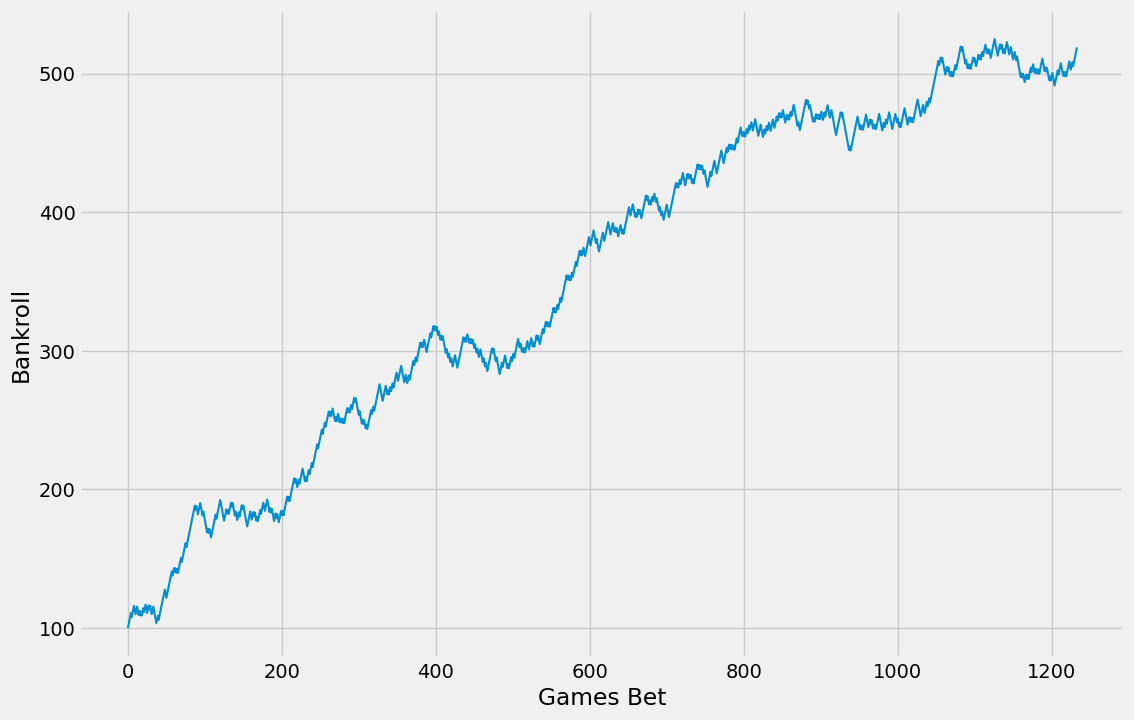

min balance: 102.72727272727273 
max balance: 524.9090909090999 
final balance: 521.6363636363737 
win percentage 58.35 
profit: 421.6363636363635 risk: 3702.0 
ROI: 11.39


(      index   SEASON HOME_TEAM_ABBREVIATION            GAME_DATE     GAME_ID  \
 0      9729  2021-22                    LAL  2021-10-22 00:00:00  0022100025   
 1      9728  2021-22                    DEN  2021-10-22 00:00:00  0022100024   
 2      9727  2021-22                    HOU  2021-10-22 00:00:00  0022100023   
 3      9726  2021-22                    CHI  2021-10-22 00:00:00  0022100022   
 4      9730  2021-22                    SAC  2021-10-22 00:00:00  0022100026   
 ...     ...      ...                    ...                  ...         ...   
 1229  10950  2021-22                    GSW  2022-06-05 00:00:00  0042100402   
 1230  10951  2021-22                    BOS  2022-06-08 00:00:00  0042100403   
 1231  10952  2021-22                    BOS  2022-06-10 00:00:00  0042100404   
 1232  10953  2021-22                    GSW  2022-06-13 00:00:00  0042100405   
 1233  10954  2021-22                    BOS  2022-06-16 00:00:00  0042100406   
 
           MATCHUP  HOME_H

In [22]:
simulate_bets_1(df_sgd_selected_bets, unit_size=3)

In [29]:
df_sgd_selected_bets[['HOME_TEAM_ABBREVIATION', 'MATCHUP', 'HOME_TEAM_SCORE', 'AWAY_TEAM_SCORE', 'HOME_SCORE_PRED', 'AWAY_SCORE_PRED']].head(20)

,HOME_TEAM_ABBREVIATION,MATCHUP,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,HOME_SCORE_PRED,AWAY_SCORE_PRED
9729,LAL,LAL vs. PHX,105,115,101.409106,106.195191
9728,DEN,DEN vs. SAS,102,96,119.125615,113.264314
9727,HOU,HOU vs. OKC,124,91,118.108227,108.858291
9726,CHI,CHI vs. NOP,128,112,112.328137,104.627422
9730,SAC,SAC vs. UTA,101,110,110.267397,111.673057
9724,BOS,BOS vs. TOR,83,115,111.706785,110.630277
9723,WAS,WAS vs. IND,135,134,116.696698,125.644524
9722,ORL,ORL vs. NYK,96,121,94.802839,103.981064
9721,CLE,CLE vs. CHA,112,123,114.231737,116.522946
9725,PHI,PHI vs. BKN,109,114,110.523665,108.128731


In [28]:
sgd_preds[['HOME_TEAM_ABBREVIATION', 'MATCHUP', 'HOME_TEAM_SCORE', 'AWAY_TEAM_SCORE', 'HOME_SCORE_PRED', 'AWAY_SCORE_PRED']].head(20)

,HOME_TEAM_ABBREVIATION,MATCHUP,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,HOME_SCORE_PRED,AWAY_SCORE_PRED
0,LAL,LAL vs. PHX,105,115,97.196346,104.648777
1,DEN,DEN vs. SAS,102,96,117.205307,113.625334
2,HOU,HOU vs. OKC,124,91,117.503751,104.458620
3,CHI,CHI vs. NOP,128,112,115.026841,102.441450
4,SAC,SAC vs. UTA,101,110,110.616742,109.058593
5,BOS,BOS vs. TOR,83,115,109.327167,112.588914
6,WAS,WAS vs. IND,135,134,116.580948,127.422853
7,ORL,ORL vs. NYK,96,121,91.693906,100.877446
8,CLE,CLE vs. CHA,112,123,109.261717,115.928418
9,PHI,PHI vs. BKN,109,114,111.162562,106.539837
